# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [131]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

ModuleNotFoundError: No module named 'sklearn'

To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [133]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,233,100,52,104,189,59,10,208,32,24,163,220,642,197,70,1,22,187,198
1,327,89,44,82,136,54,6,149,45,19,144,170,332,168,68,10,14,188,193
2,127,85,41,66,155,65,22,149,45,19,139,173,330,155,75,6,16,184,191
3,620,108,56,103,234,73,10,221,30,25,174,232,718,214,73,8,3,187,197
4,624,84,36,75,136,55,6,140,48,18,125,166,290,138,71,4,36,189,195
5,809,79,38,55,120,55,5,142,48,19,128,153,295,145,81,4,2,180,183
6,292,87,42,76,159,65,5,155,42,19,138,184,362,157,76,6,12,189,193
7,618,98,39,68,136,56,8,131,52,18,144,159,251,134,72,4,10,186,187
8,336,89,44,76,125,54,10,156,44,20,151,163,352,176,76,12,12,184,193
9,515,76,38,58,125,58,5,133,51,18,127,152,259,145,87,0,21,177,184


Methods `describe` and `info` deliver some useful information.

In [134]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,406.659381,93.644809,44.972678,82.428051,169.622951,61.857923,8.750455,169.704918,40.743169,20.650273,148.122040,189.721311,444.320583,175.814208,72.763206,6.289617,12.504554,188.703097,195.446266
std,237.505664,8.382696,6.287891,15.923426,34.661843,8.795001,5.204366,33.599026,7.799587,2.642595,14.672509,32.193993,179.624159,33.574382,8.009258,4.860265,8.971695,6.166575,7.493022
min,0.000000,73.000000,33.000000,42.000000,104.000000,47.000000,3.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,208.000000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,136.000000,168.000000,321.000000,150.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,399.000000,92.000000,44.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,365.000000,174.000000,72.000000,6.000000,11.000000,188.000000,197.000000
75%,609.000000,100.000000,50.000000,98.000000,197.000000,65.000000,10.000000,200.000000,46.000000,23.000000,160.000000,218.000000,600.000000,200.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,844.000000,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,265.000000,59.000000,29.000000,186.000000,320.000000,1018.000000,264.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [135]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


In [136]:
y_train_pd = pd.DataFrame(y_train)

# First 15 rows of our dataset.
y_train_pd.head(15)

,0
0,saab
1,opel
2,bus
3,saab
4,saab
5,saab
6,bus
7,van
8,van
9,opel


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

Data observation:

The features are on different scales (5,11), confirming the need for scaling before model training to ensure uniformity.
There’s no indication of missing values since all columns have 549 entries.

In [137]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [138]:
import pandas as pd

# Create DataFrame for X_train_scaled to inspect the first few rows
X_train_scaled_df = pd.DataFrame(X_train_scaled)

# Display the first 5 rows of scaled training data and encoded target
X_train_scaled_df.head(), y_train[
    :5
]  # Displaying first 5 rows of scaled features and corresponding labels

(         0         1         2         3         4         5         6   \
 0 -0.731847  0.758824  1.118615  1.355966  0.559541 -0.325245  0.240314   
 1 -0.335706 -0.554600 -0.154832 -0.026906 -0.970912 -0.894268 -0.528972   
 2 -1.178559 -1.032209 -0.632374 -1.032632 -0.422259  0.357583  2.548174   
 3  0.899074  1.714041  1.755339  1.293108  1.858983  1.268020  0.240314   
 4  0.915931 -1.151611 -1.428279 -0.466911 -0.970912 -0.780464 -0.528972   
 
          7         8         9         10        11        12        13  \
 0  1.140807 -1.122001  1.268746  1.014927  0.941365  1.101521  0.631586   
 1 -0.616798  0.546274 -0.625059 -0.281192 -0.613136 -0.625879 -0.232955   
 2 -0.616798  0.546274 -0.625059 -0.622277 -0.519866 -0.637024 -0.620509   
 3  1.528076 -1.378659  1.647507  1.765312  1.314445  1.525012  1.138386   
 4 -0.884907  0.931261 -1.003820 -1.577312 -0.737496 -0.859914 -1.127309   
 
          14        15        16        17        18  
 0 -0.345316 -1.089332  1.059

In [139]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
encoder = LabelEncoder()

# Fit and transform y_train and y_test
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Check the label-to-class mapping
label_mapping = dict(zip(encoder.classes_, range(len(encoder.classes_))))
print("Label mapping:", label_mapping)

Label mapping: {'bus': 0, 'opel': 1, 'saab': 2, 'van': 3}


what I Did?:
- standardized the features to ensure that all features have the same scale (mean = 0, standard deviation = 1) to prevent features with larger ranges from dominating the model.
- encode the target labels using LabelEncoder to convert them into numerical form before proceeding with model training.

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

In [141]:
# Define the logistic regression model (in the new version no need to specify multi_class='multinomial')
log_reg = LogisticRegression(solver="saga", tol=1e-3, max_iter=500)

# Set up hyperparameter grid (small search space)
param_grid = {"C": [0.1, 1, 10]}

# Cross-validation search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_scaled, y_train_encoded)

# Best parameters
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'C': 10}


In [142]:
from sklearn.metrics import accuracy_score, f1_score

# Predict on the test set
y_pred = grid_search.predict(X_test_scaled)

# Calculate accuracy and f1 score
accuracy = accuracy_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred, average="macro")

print("Accuracy: ", accuracy)
print("F1 Score: ", f1)

Accuracy:  0.8148148148148148
F1 Score:  0.809641462290469


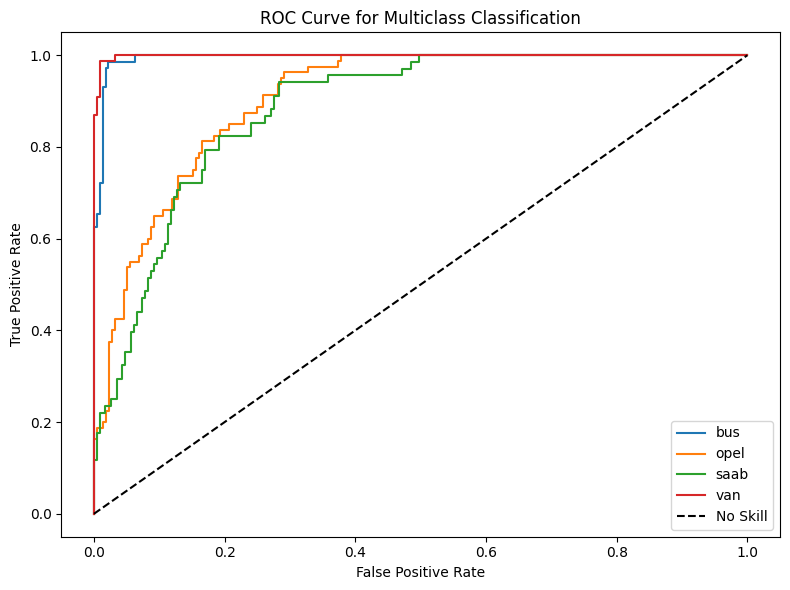

In [145]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize

# Binarize the labels for ROC curve (for multiclass)
n_classes = len(set(y_train_encoded))
y_test_binarized = label_binarize(y_test_encoded, classes=range(n_classes))

# Get predicted probabilities for ROC curve
y_proba = grid_search.predict_proba(X_test_scaled)

# Reverse the label_mapping dictionary to map numerical values back to label names
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

# Create a smaller plot
plt.figure(figsize=(8, 6))

# Plot ROC curve for each class using label names, all in the same plot
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
    plt.plot(fpr, tpr, label=f"{reverse_label_mapping[i]}")

# Add a diagonal line for "No Skill" classifier
plt.plot([0, 1], [0, 1], "k--", label="No Skill")

# Add labels, title, and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multiclass Classification")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [ ]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

In [82]:
# Check for Class Imbalance
# Combine y_train and y_test for a complete picture of label distribution
all_labels = pd.Series(list(y_train_encoded) + list(y_test_encoded))

# Check class distribution
class_distribution = all_labels.value_counts()
print("Class distribution:\n", class_distribution)

# If label mapping exists, we can also map the numeric values back to the original labels
class_distribution_mapped = class_distribution.rename(index=reverse_label_mapping)
print("\nClass distribution with labels:\n", class_distribution_mapped)

Class distribution:
 0    218
2    217
1    212
3    199
Name: count, dtype: int64

Class distribution with labels:
 bus     218
saab    217
opel    212
van     199
Name: count, dtype: int64


In [83]:
# Check Feature Similarity
X_train_df = pd.DataFrame(X_train_scaled)
X_train_df["label"] = y_train_encoded

# Calculate the average feature values for each class
average_features_by_class = X_train_df.groupby("label").mean()

# Map the label numbers back to the original class names
average_features_by_class.index = average_features_by_class.index.map(reverse_label_mapping)

print("Average feature values by class:\n", average_features_by_class)

Average feature values by class:
               0         1         2         3         4         5         6  \
label                                                                         
bus   -0.091249 -0.220282  0.046439 -0.318601 -0.061640  0.221918 -0.348710   
opel   0.048481  0.170296  0.353517  0.450031  0.332071 -0.102910  0.078640   
saab   0.102619  0.372858  0.032630  0.374181  0.312139 -0.098517  0.028802   
van   -0.064535 -0.348833 -0.471960 -0.549313 -0.632401 -0.022204  0.261454   

              7         8         9        10        11        12        13  \
label                                                                         
bus    0.063987 -0.127854  0.023798 -0.094392  0.154928  0.081492  0.234901   
opel   0.421607 -0.396506  0.414346  0.295948  0.324555  0.410890  0.223279   
saab   0.269367 -0.299546  0.273331 -0.029980  0.224510  0.244758  0.054930   
van   -0.820518  0.894914 -0.773236 -0.188733 -0.764799 -0.801285 -0.558169   

             14 

observation note:

F1 score balances precision and recall, so a model struggling with certain classes (e.g., 'opel', 'saab') will have a lower F1 score.


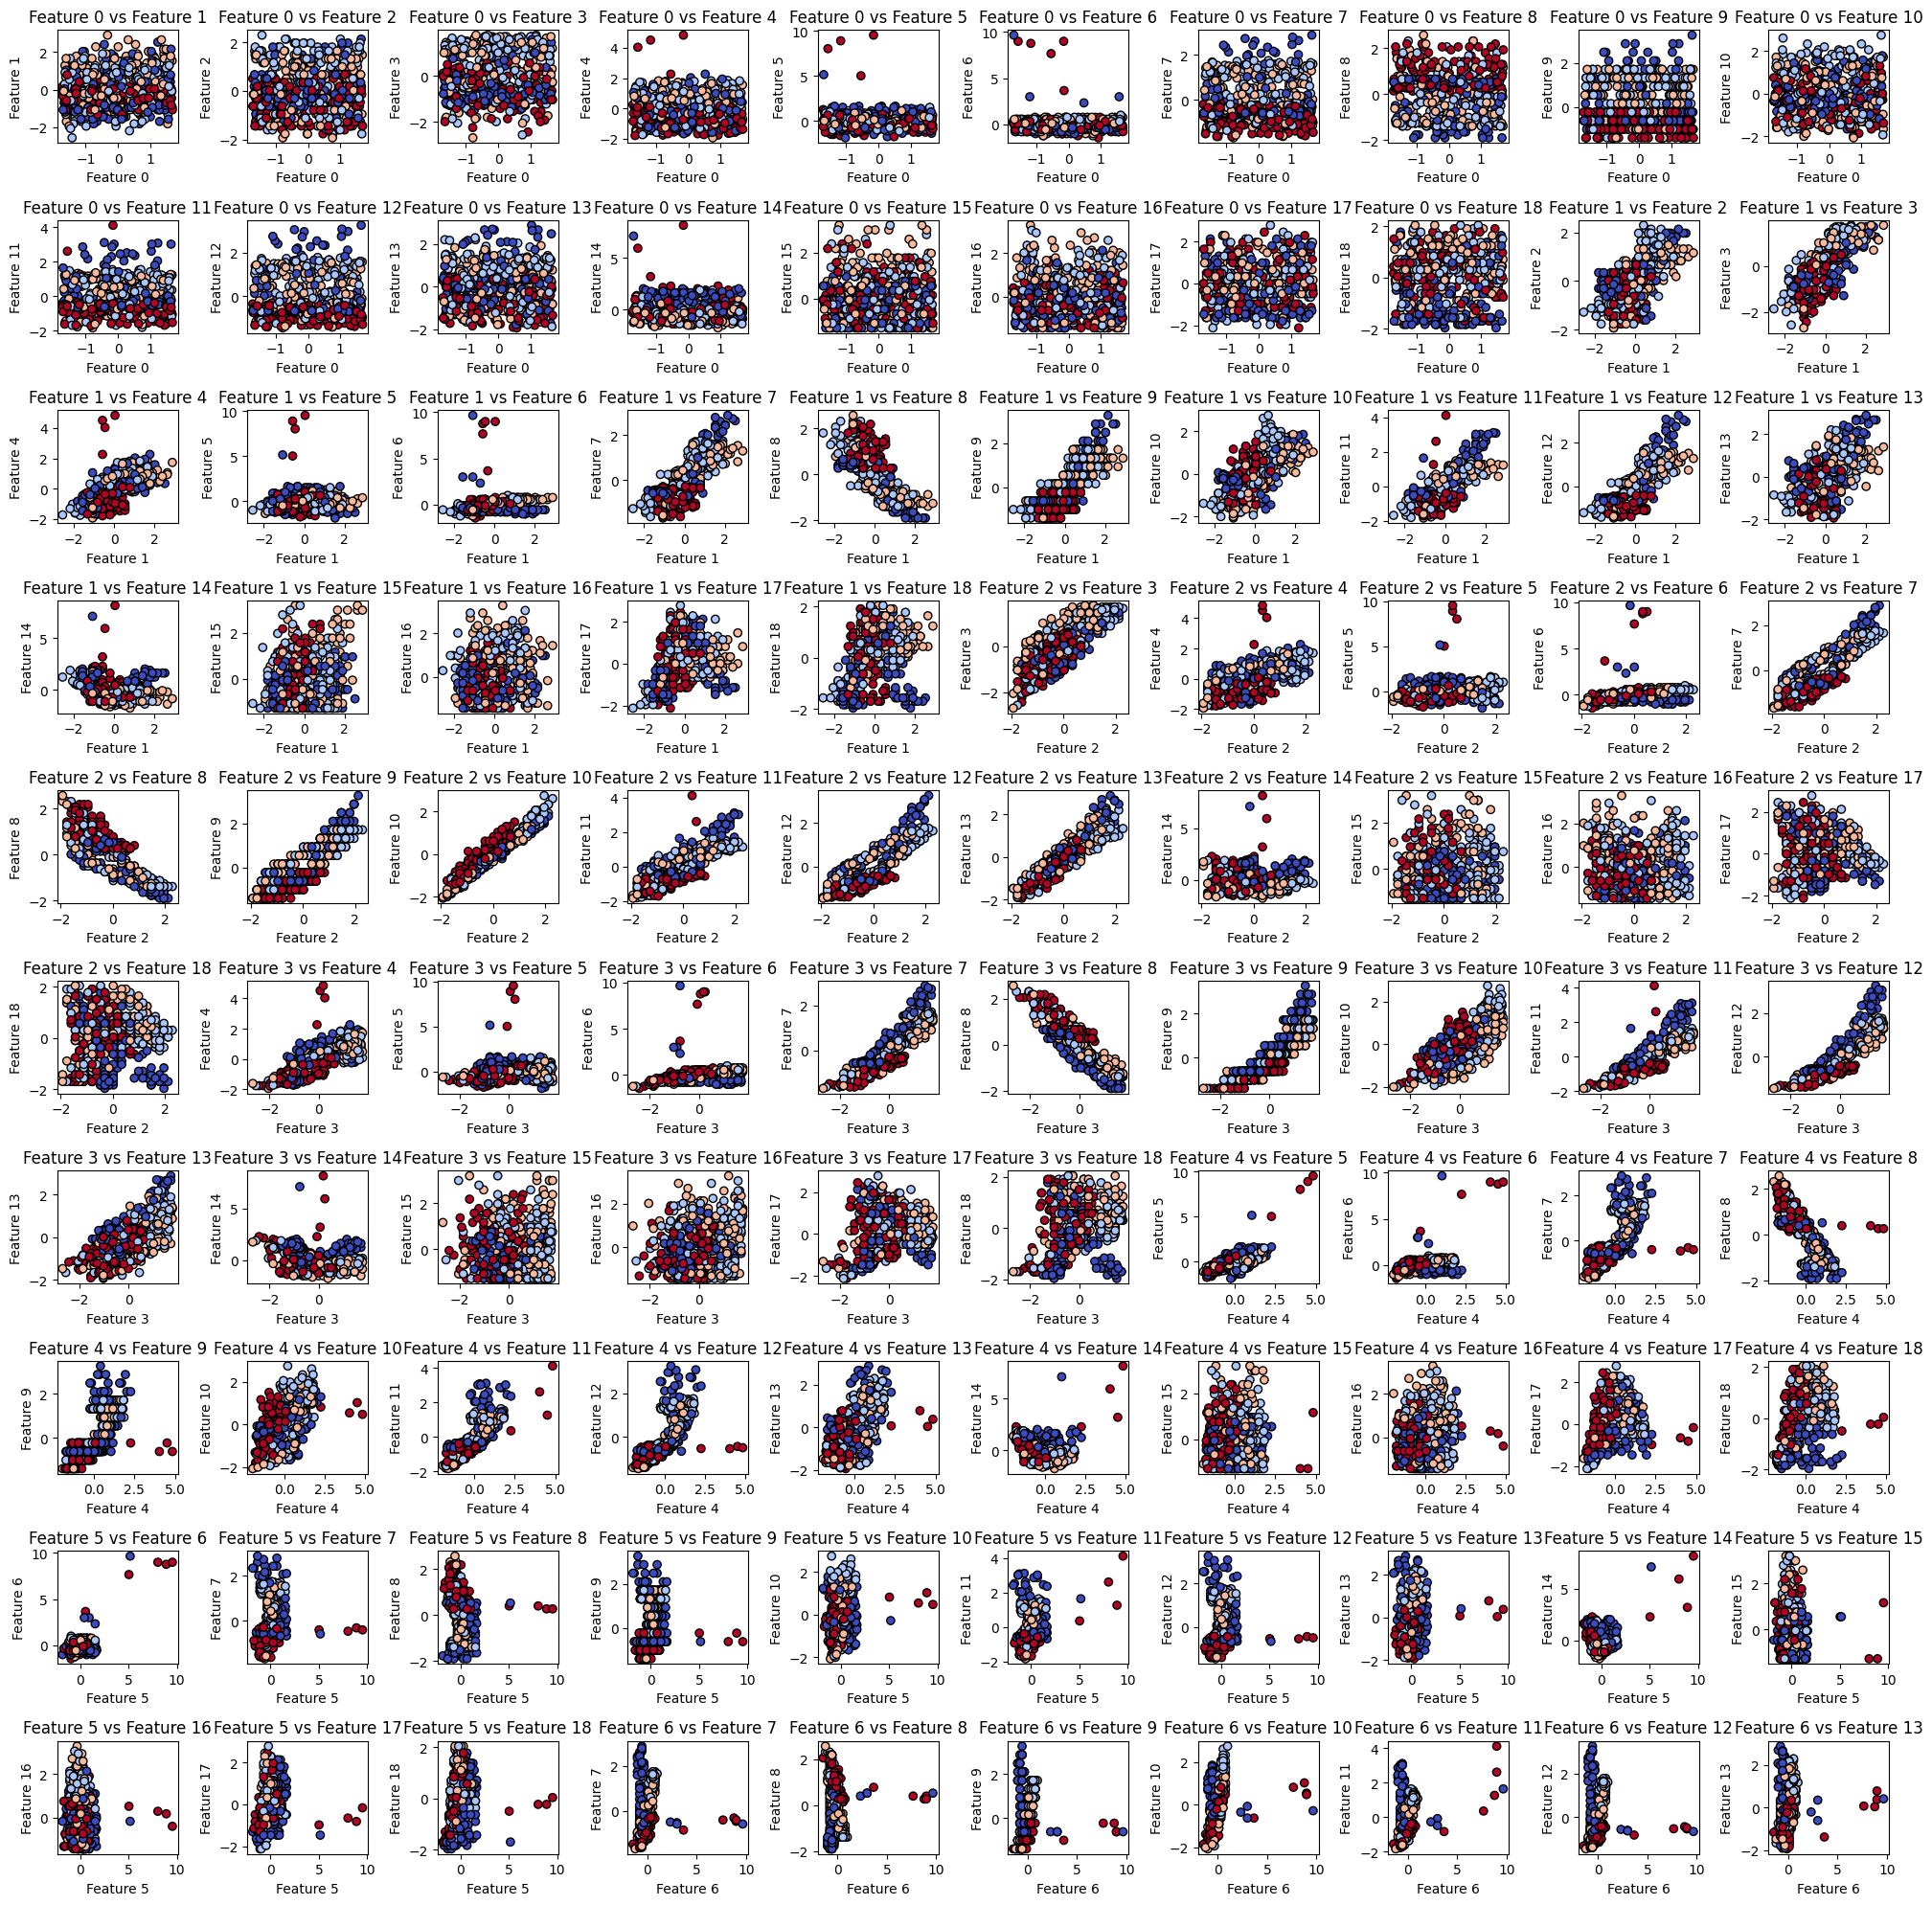

In [99]:
import matplotlib.pyplot as plt
import itertools

# Number of features in the dataset
num_features = X_train_scaled.shape[1]

# Create all possible feature pairs (combinations of two features)
feature_pairs = list(itertools.combinations(range(num_features), 2))

n_rows = 10
n_cols = 10

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
axes = axes.flatten()  # Flatten the axes to easily loop through them

# Plot each pair of features
for idx, (i, j) in enumerate(
    feature_pairs[: n_rows * n_cols]
):  # Adjust to limit the number of plots
    ax = axes[idx]
    ax.scatter(
        X_train_scaled[:, i],
        X_train_scaled[:, j],
        c=y_train_encoded,
        cmap="coolwarm",
        edgecolor="k",
    )
    ax.set_xlabel(f"Feature {i}")
    ax.set_ylabel(f"Feature {j}")
    ax.set_title(f"Feature {i} vs Feature {j}")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

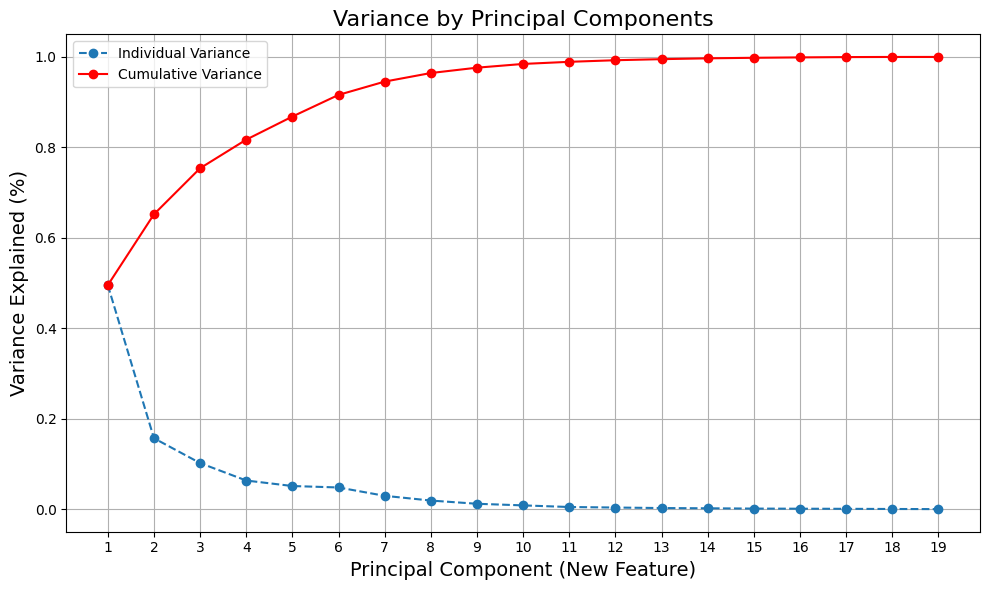

In [96]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to the training data (features only)
pca = PCA()
pca.fit(X_train_scaled)

# Explained variance ratio (how much variance each principal component explains)
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance (how much total variance is explained as we add components)
cumulative_variance = explained_variance_ratio.cumsum()

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(explained_variance_ratio) + 1),
    explained_variance_ratio,
    marker="o",
    linestyle="--",
    label="Individual Variance",
)
plt.plot(
    range(1, len(cumulative_variance) + 1),
    cumulative_variance,
    marker="o",
    linestyle="-",
    color="red",
    label="Cumulative Variance",
)

plt.title("Variance by Principal Components", fontsize=16)
plt.xlabel("Principal Component (New Feature)", fontsize=14)
plt.ylabel("Variance Explained (%)", fontsize=14)
plt.xticks(range(1, len(explained_variance_ratio) + 1))  # Ensure x-ticks match component numbers
plt.grid(True)

# Add a legend to differentiate between individual and cumulative variance
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [100]:
# Select the number of components that explain 90% of the variance
n_components = sum(cumulative_variance < 0.90) + 1  # 90% variance threshold
print(f"Selected number of components: {n_components}")

Selected number of components: 6


observation note:

The plot indicates that the first 6 principal components explain around 90% of the variance. 
Keeping these 6 components would simplify the dataset while retaining most of the useful information.

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [101]:
# Select 6 Components
# since we already know the number of components we want to keep, we can directly specify it.

In [94]:
# Normalizing the Data
#  since the data has already been scaled using StandardScaler, we don't need to normalize it again.

In [121]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Define a function to scale and apply PCA
def apply_pca(X_train, X_test, n_components):
    # Create a pipeline for scaling and PCA
    pca_pipeline = Pipeline(
        [
            ("scaler", StandardScaler()),  # Step 1: Scaling
            ("pca", PCA(n_components=n_components)),  # Step 2: PCA with n_components
        ]
    )

    # Fit and transform the training data
    X_train_pca = pca_pipeline.fit_transform(X_train)

    # Transform the test data
    X_test_pca = pca_pipeline.transform(X_test)

    return X_train_pca, X_test_pca, pca_pipeline


# Use the function in Task 2.3
n_components = n_components
X_train_pca, X_test_pca, pca_pipeline = apply_pca(X_train, X_test, n_components)

# Check the shape of the transformed data
print("X_train_pca shape:", X_train_pca.shape)
print("X_test_pca shape:", X_test_pca.shape)

X_train_pca shape: (549, 6)
X_test_pca shape: (297, 6)


observation note:

using pipeline approch

Step 1: StandardScaler for scaling the data.

Step 2: PCA with 10 components

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

Accuracy: 0.7070707070707071
F1 Score: 0.698375805104892


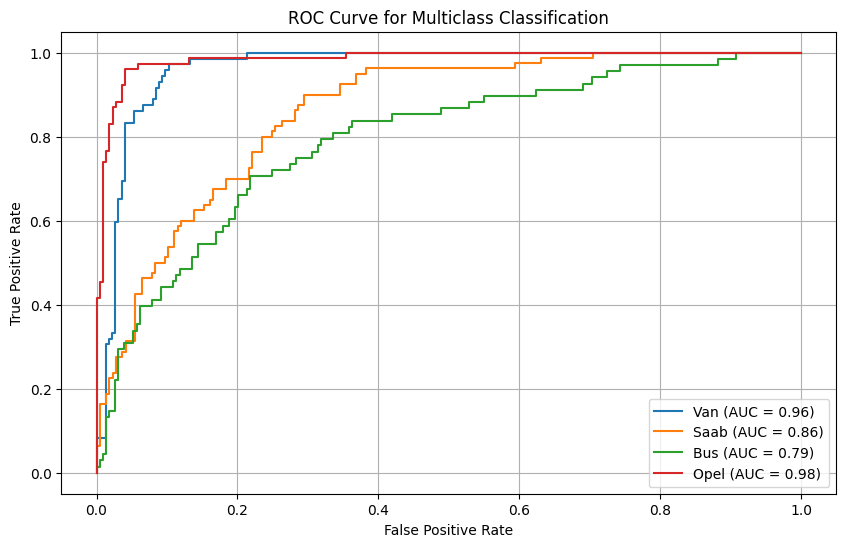

In [148]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Reuse the apply_pca function from Task 2.3 to transform the data
X_train_pca, X_test_pca, pca_pipeline = apply_pca(X_train, X_test, n_components=10)

# Define Logistic Regression with hyperparameters
logistic_regression = LogisticRegression(solver="saga", max_iter=500, tol=1e-3)

# Define the hyperparameter grid
param_grid = {"C": [0.01, 0.1, 1, 10]}

# Perform cross-validation with GridSearchCV
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_pca, y_train)

# Get the best Logistic Regression model
best_logistic_regression = grid_search.best_estimator_

# Predict on the test set
y_pred = best_logistic_regression.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

# Plot ROC curve for each class
y_proba = best_logistic_regression.predict_proba(X_test_pca)
plt.figure(figsize=(10, 6))
label_mapping = {0: "Van", 1: "Saab", 2: "Bus", 3: "Opel"}

for i in range(len(np.unique(y_train))):  # Iterate through each class
    fpr, tpr, _ = roc_curve(y_test_encoded == i, y_proba[:, i])
    plt.plot(
        fpr,
        tpr,
        label=f"{label_mapping[i]} (AUC = {roc_auc_score(y_test_encoded == i, y_proba[:, i]):.2f})",
    )


# Configure plot
plt.title("ROC Curve for Multiclass Classification")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

Optimal Tree Depth: 13
Accuracy: 0.5589225589225589
F1 Score: 0.5655232893161583


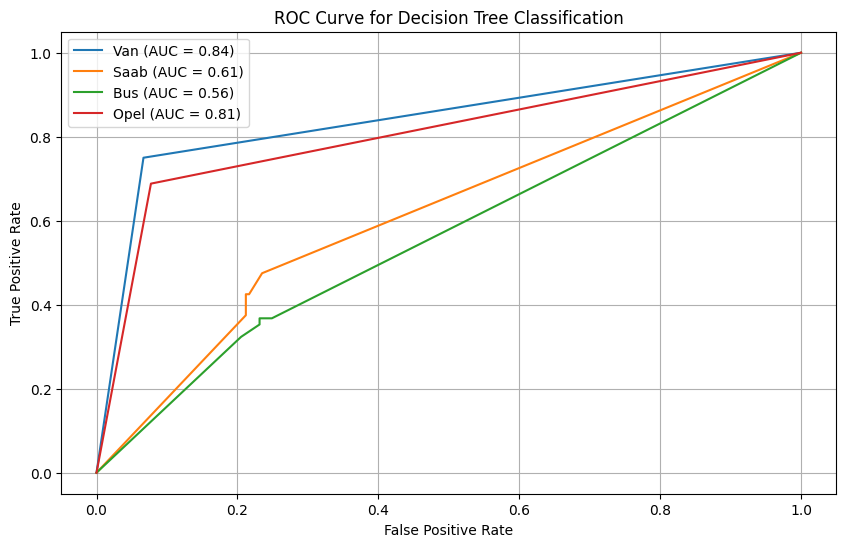

In [161]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define the Decision Tree model
decision_tree = DecisionTreeClassifier()

# Define the parameter grid for cross-validation (max_depth tuning)
param_grid = {"max_depth": range(1, 15)}

# Perform cross-validation using GridSearchCV to find the optimal max_depth
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_pca, y_train)  # Use the PCA-transformed data or raw data

# Get the best decision tree model
best_decision_tree = grid_search.best_estimator_

# Predict on the test set
y_pred = best_decision_tree.predict(X_test_pca)  # Use the PCA-transformed data or raw data

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

best_depth = grid_search.best_params_['max_depth']

print(f"Optimal Tree Depth: {best_depth}")
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

# Plot ROC curve for each class
y_proba = best_decision_tree.predict_proba(X_test_pca)
plt.figure(figsize=(10, 6))
label_mapping = {0: "Van", 1: "Saab", 2: "Bus", 3: "Opel"}

for i in range(len(np.unique(y_train))):  # Iterate through each class
    fpr, tpr, _ = roc_curve(y_test_encoded == i, y_proba[:, i])
    plt.plot(
        fpr,
        tpr,
        label=f"{label_mapping[i]} (AUC = {roc_auc_score(y_test_encoded == i, y_proba[:, i]):.2f})",
    )

# Configure plot
plt.title("ROC Curve for Decision Tree Classification")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

Decision Tree with Raw Data - Accuracy: 0.7171717171717171
Decision Tree with Raw Data - F1 Score: 0.7090710891880483


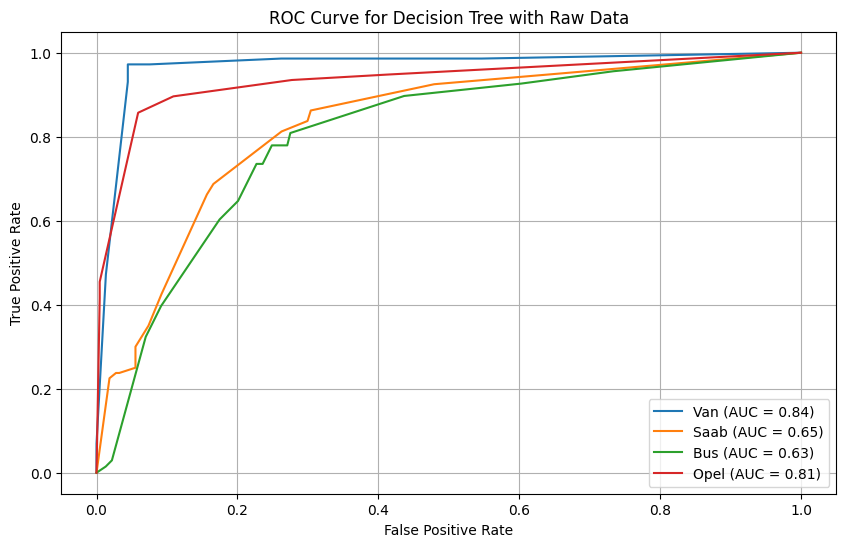

In [154]:
# Train decision tree on raw data (without PCA)
decision_tree_raw = DecisionTreeClassifier()

# Perform cross-validation using raw data
grid_search_raw = GridSearchCV(decision_tree_raw, param_grid, cv=5, scoring="accuracy")
grid_search_raw.fit(X_train, y_train)

# Get the best decision tree model for raw data
best_decision_tree_raw = grid_search_raw.best_estimator_

# Predict using raw test data
y_pred_raw = best_decision_tree_raw.predict(X_test)

# Evaluate using raw data
accuracy_raw = accuracy_score(y_test, y_pred_raw)
f1_raw = f1_score(y_test, y_pred_raw, average="weighted")

print(f"Decision Tree with Raw Data - Accuracy: {accuracy_raw}")
print(f"Decision Tree with Raw Data - F1 Score: {f1_raw}")

# Plot ROC curve for the raw data model
y_proba_raw = best_decision_tree_raw.predict_proba(X_test)
plt.figure(figsize=(10, 6))
for i in range(len(np.unique(y_train))):
    fpr, tpr, _ = roc_curve(y_test_encoded == i, y_proba_raw[:, i])
    plt.plot(
        fpr,
        tpr,
        label=f"{label_mapping[i]} (AUC = {roc_auc_score(y_test_encoded == i, y_proba[:, i]):.2f})",
    )
plt.title("ROC Curve for Decision Tree with Raw Data")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

Observations note:

I try to test both the models (with PCA and without PCA), the AUC values are almost the same for each class, but performance on the raw data itself give a high accuracy.

from the theory PCA works best when there are high correlations among the features maybe for this case it’s possible that the features were already informative and reducing the dimensionality through PCA removed some useful information that was helping the model

I also research it say that:

PCA is considered to be one of the most common techniques for dimensionality reduction. After applying it, you will get less number of features, where decision tree can (hopefully) use to produce better performance. Note that applying PCA is not always recommended.

https://www.researchgate.net/post/the_effect_PCA_in_decision_tree#:~:text=PCA%20is%20considered%20to%20be,PCA%20is%20not%20always%20recommended.


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
# YOUR CODE HERE

In [165]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Prepare to store the results
ensemble_sizes = list(range(2, 101, 5))  # Vary ensemble size from 2 to 100 with step of 5
logreg_accuracy = []
logreg_f1 = []
tree_accuracy = []
tree_f1 = []

# Hyperparameters from previous sections
logistic_regression = LogisticRegression(solver="saga", max_iter=500, tol=1e-3)
decision_tree = DecisionTreeClassifier(max_depth=best_depth)

# Bagging Logistic Regression
for n in ensemble_sizes:
    bagging_logreg = BaggingClassifier(
        estimator=logistic_regression, n_estimators=n, bootstrap=True, n_jobs=-1
    )
    bagging_logreg.fit(X_train, y_train)
    y_pred_logreg = bagging_logreg.predict(X_test)

    # Evaluate
    logreg_accuracy.append(accuracy_score(y_test, y_pred_logreg))
    logreg_f1.append(f1_score(y_test, y_pred_logreg, average="weighted"))

# Bagging Decision Tree
for n in ensemble_sizes:
    bagging_tree = BaggingClassifier(
        estimator=decision_tree, n_estimators=n, bootstrap=True, n_jobs=-1
    )
    bagging_tree.fit(X_train, y_train)
    y_pred_tree = bagging_tree.predict(X_test)

    # Evaluate
    tree_accuracy.append(accuracy_score(y_test, y_pred_tree))
    tree_f1.append(f1_score(y_test, y_pred_tree, average="weighted"))




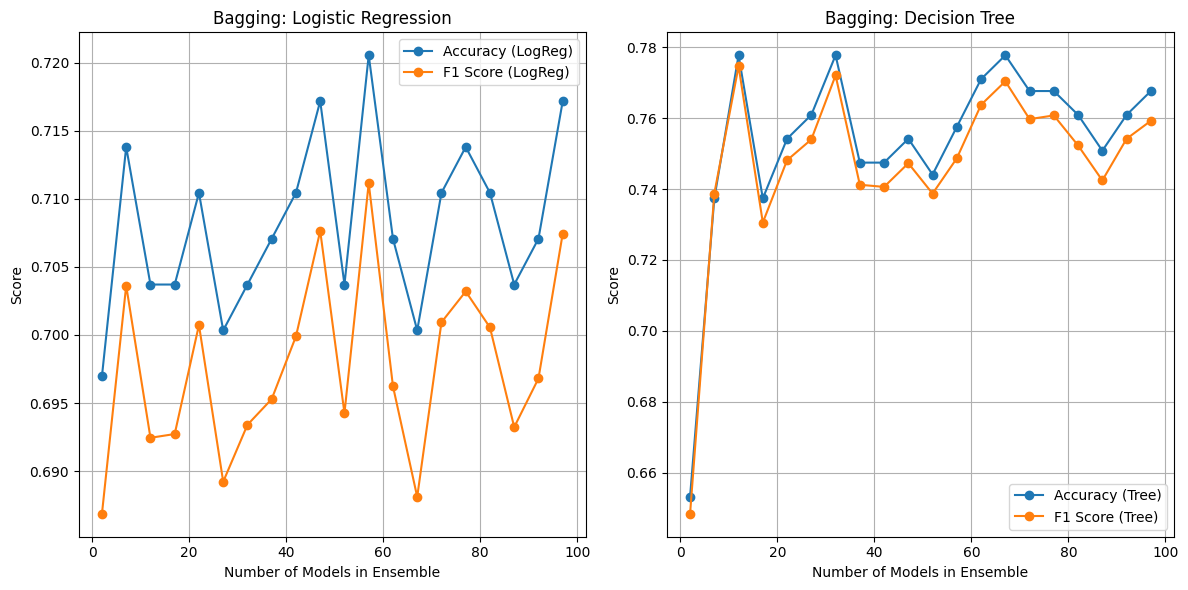

In [164]:
# Plot results
plt.figure(figsize=(12, 6))

# Logistic Regression plots
plt.subplot(1, 2, 1)
plt.plot(ensemble_sizes, logreg_accuracy, label="Accuracy (LogReg)", marker="o")
plt.plot(ensemble_sizes, logreg_f1, label="F1 Score (LogReg)", marker="o")
plt.title("Bagging: Logistic Regression")
plt.xlabel("Number of Models in Ensemble")
plt.ylabel("Score")
plt.legend()
plt.grid(True)

# Decision Tree plots
plt.subplot(1, 2, 2)
plt.plot(ensemble_sizes, tree_accuracy, label="Accuracy (Tree)", marker="o")
plt.plot(ensemble_sizes, tree_f1, label="F1 Score (Tree)", marker="o")
plt.title("Bagging: Decision Tree")
plt.xlabel("Number of Models in Ensemble")
plt.ylabel("Score")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

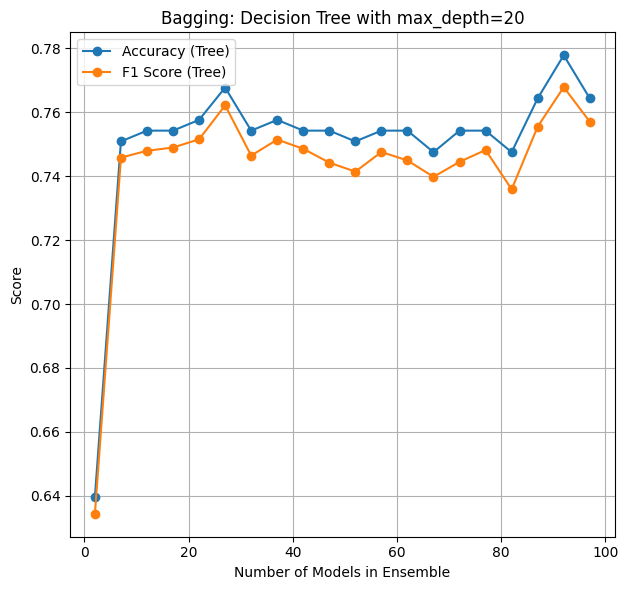

In [172]:
# Initialize empty lists to store accuracy and F1 scores for decision trees
tree_accuracy = []  # Reset before the loop
tree_f1 = []  # Reset before the loop

# Bagging Decision Tree with adjusted max_depth
decision_tree = DecisionTreeClassifier(max_depth=20)
for n in ensemble_sizes:
    bagging_tree = BaggingClassifier(
        estimator=decision_tree, n_estimators=n, bootstrap=True, n_jobs=-1
    )
    bagging_tree.fit(X_train, y_train)
    y_pred_tree = bagging_tree.predict(X_test)

    # Evaluate the model and append the results
    tree_accuracy.append(accuracy_score(y_test, y_pred_tree))
    tree_f1.append(f1_score(y_test, y_pred_tree, average="weighted"))

# Now you should have the same number of values in ensemble_sizes, tree_accuracy, and tree_f1

# Plot results
plt.figure(figsize=(12, 6))
# Decision Tree plots
plt.subplot(1, 2, 2)
plt.plot(ensemble_sizes, tree_accuracy, label="Accuracy (Tree)", marker="o")
plt.plot(ensemble_sizes, tree_f1, label="F1 Score (Tree)", marker="o")
plt.title("Bagging: Decision Tree with max_depth=20")
plt.xlabel("Number of Models in Ensemble")
plt.ylabel("Score")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

observation note:

Logistic Regression: it seems to stabilize somewhat around 80 models. However, the fluctuations suggest that logistic regression might not be the best model for this task.

Decision Tree: The decision tree seem to stabilizes after around 20-30 models. Adding more trees doesn't provide a significant boost in accuracy or F1 score.

In term of hyperparameters for the decision trees that found in 2.5 is optimal for trees used in ensemble compare to just random choose 

depth=2 - stabilizes after around 70 models

depth=10 - stabilizes after around 20-30 models

depth=20 - stabilizes after around 20-30 models

so having hyperparameters for the decision trees that found in 2.5 it help to reduce the random experement time.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

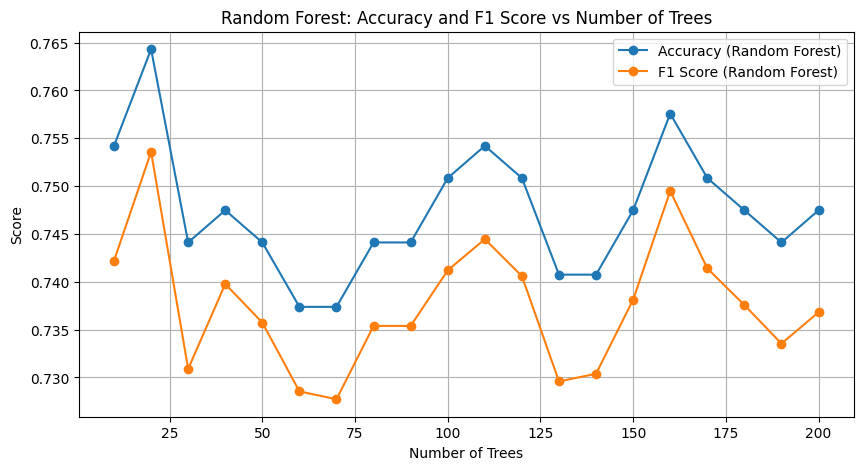

In [173]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

# Define the number of trees to try
tree_counts = list(range(10, 201, 10))  # from 10 to 200 trees with step 10

rf_accuracy = []
rf_f1 = []

# Loop through each number of trees and fit the model
for n_trees in tree_counts:
    rf_model = RandomForestClassifier(n_estimators=n_trees, random_state=42, n_jobs=-1)
    rf_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred_rf = rf_model.predict(X_test)

    # Evaluate the model
    rf_accuracy.append(accuracy_score(y_test, y_pred_rf))
    rf_f1.append(f1_score(y_test, y_pred_rf, average="weighted"))

# Plot the results
plt.figure(figsize=(10, 5))

# Accuracy plot
plt.plot(tree_counts, rf_accuracy, label="Accuracy (Random Forest)", marker="o")
plt.plot(tree_counts, rf_f1, label="F1 Score (Random Forest)", marker="o")

# Configure plot
plt.title("Random Forest: Accuracy and F1 Score vs Number of Trees")
plt.xlabel("Number of Trees")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

Observation note:

from the plot, it appears that the best performance in terms of both accuracy and F1 score occurs with around 25 trees or fewer.


#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
# YOUR CODE HERE

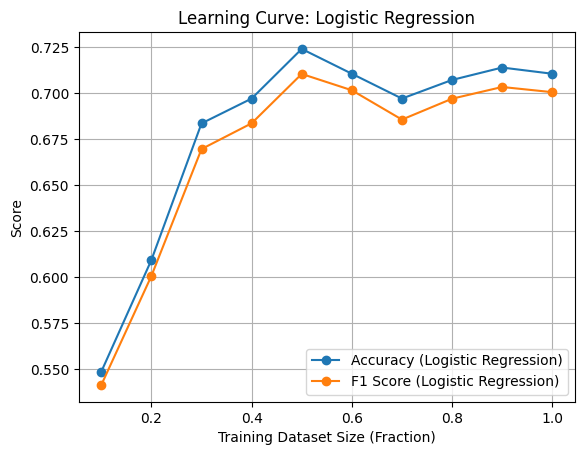

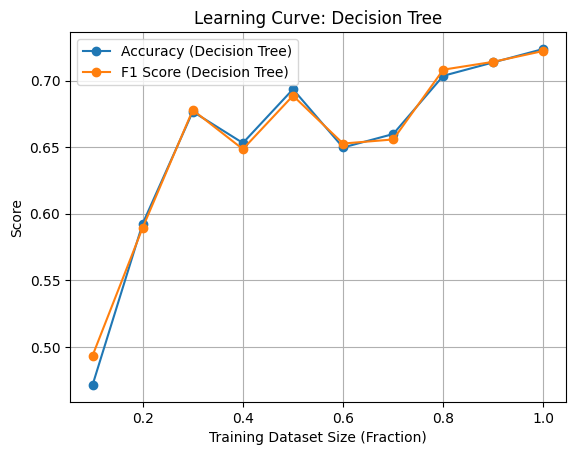

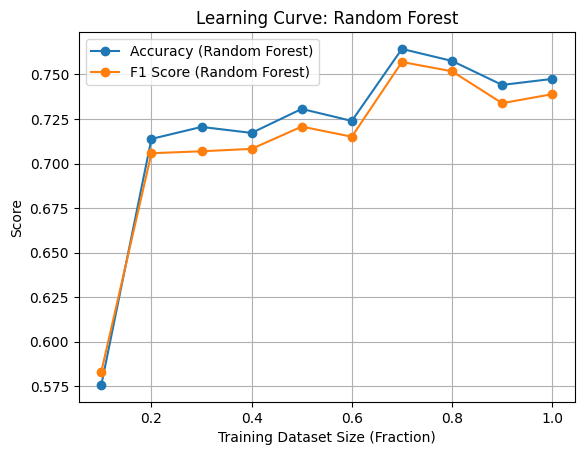

In [175]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score


# Function to calculate learning curves
def plot_learning_curve(model, X_train, y_train, X_test, y_test, model_name):
    train_sizes = np.linspace(0.1, 1.0, 10)  # 10 equal parts of training data
    accuracy_scores = []
    f1_scores = []

    # Iterate over different training sizes
    for train_size in train_sizes:
        X_train_part = X_train[: int(train_size * len(X_train))]
        y_train_part = y_train[: int(train_size * len(y_train))]

        model.fit(X_train_part, y_train_part)  # Train the model on the current subset
        y_pred = model.predict(X_test)  # Predict on the test set

        # Calculate accuracy and F1 score
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="weighted")

        accuracy_scores.append(accuracy)
        f1_scores.append(f1)

    # Plot accuracy and F1 score
    plt.plot(train_sizes, accuracy_scores, label=f"Accuracy ({model_name})", marker="o")
    plt.plot(train_sizes, f1_scores, label=f"F1 Score ({model_name})", marker="o")
    plt.title(f"Learning Curve: {model_name}")
    plt.xlabel("Training Dataset Size (Fraction)")
    plt.ylabel("Score")
    plt.legend()
    plt.grid(True)
    plt.show()


# Split X_train and y_train into 10 equal parts
X_train_splits = np.array_split(X_train, 10)
y_train_splits = np.array_split(y_train, 10)

# Combine splits back as needed
X_train_combined = [np.vstack(X_train_splits[: i + 1]) for i in range(10)]
y_train_combined = [np.hstack(y_train_splits[: i + 1]) for i in range(10)]

# Optimal models with hyperparameters
logreg = LogisticRegression(solver="saga", max_iter=1000, tol=1e-3)
decision_tree = DecisionTreeClassifier(max_depth=13)  # Optimal depth from above
random_forest = RandomForestClassifier(n_estimators=25)  # Optimal from above

# Plot learning curves for each model
plot_learning_curve(logreg, X_train, y_train, X_test, y_test, "Logistic Regression")
plot_learning_curve(decision_tree, X_train, y_train, X_test, y_test, "Decision Tree")
plot_learning_curve(random_forest, X_train, y_train, X_test, y_test, "Random Forest")